# Workshop: Moving from theory into practise

In this workshop we will investigate the steps needed to move from the theory presented in a research paper, to a basic, working example of the presented theory. This is an important skill within robotics and research as a whole, allowing us to not only test theories presented in research papers, but also to allow us to use new technologies or techniques within our own work.

In this workshop we will be looking to impliment the behaviour of an LIF neuron as presented in the following paper:

[^1]: **Yamazaki, Kashu, et al. "Spiking neural networks and their applications: A Review." Brain Sciences 12.7 (2022): 863.**

This tutorial shall include a basic introduction to implementation in Python and should take up to 2 hours to complete.

## 1. Python Introduction

The following section will serve as an introduction or refresher to basic programming in Python.

1. Defining a variable
2. Basic operations
3. Loops
4. Functions

## 2. Spiking Neurons

#### Short recap on spiking neurons, etc.


### Neuron Dynamics

Below are the simple equations that describe the operation of a Leaky Intergrate and Fire (LIF) neuron.

\begin{align}
\tau_m\,\frac{d}{dt}\,V(t) &= E_{L} - V(t) + R\,I(t) &\text{if }\quad V(t) \leq V_{th} \\ \\
V(t) &= V_{reset} &\text{otherwise}
\end{align}

<br>
where $V(t)$ is the membrane potential, $\tau_m$ is the membrane time constant, $E_{L}$ is the leak potential, $R$ is the membrane resistance, $I(t)$ is the synaptic input current, $V_{th}$ is the firing threshold, and $V_{reset}$ is the reset voltage. We can also write $V_m$ for membrane potential, which is more convenient for plot labels.

One technique to convert these dynamics into code is to first break down the equations into variables and operations. For example:

$\tau_m, dt, E_{L}, R, V_{th}, V_{reset}$ are constants, commonly referred to as **neuron parameters** within the context of neuron models. These constants are set for a neuron and **do not** change during operation. Therefore they can be set below without needing to be change for the rest of the worksheet.

In the code section below, set these constants to the following values (make sure to use appropriate variable names):

\begin{align}
\tau_m = 20e^{-3} \\
E_{L} = -60e^{-3} \\
R = 100e^{6} \\
V_{th} = -50e^{-3} \\
V_{reset} = -70e^{-3} \\
\end{align}

In [1]:
# Set your constants to the values above:
v_thresh = -50e-3
v_reset = -70e-3
tau = 20e-3
E_leak = -60e-3
r = 100e6

Once we have extracted the variables, we should begin to think about the operations that will be applied to them as we execute our function.

To calculate the membrane voltage at each timestep we must rearrange the equation above to form the following:

\begin{equation}
V(t + \Delta t) =  V(t) + \frac{\Delta t}{\tau_m}\left( E_L -V(t) + R I(t) \right)
\end{equation}

### Running our simulation

Now that we have a function for our LIF neuron, we need to test it in simulation. For this simple simulation, we will simply use a **for** loop to run the LIF neuron. As explained in our section on loops above, the **for** loop will run the code within the loop for a number of iterations. In the section below, add in the operations described by the above equation. 

For the purpose of this simulation $I(t) = 25e^{-11}$ and $dt = 1e^{-3}$. This runs a simulation using timesteps of 1ms and constant current of 250nA.

**NOTE** Be careful when using parathesis/brackets **(**/**)** as they will change the order of operations. Code within brackets will execute before code outside of brackets.

In [2]:
import numpy as np

# Simulation parameters
timesteps = 50   # We simulate over 50 timesteps (50ms)
i = 25e-11  # Constant current of 250nA
dt = 1e-3   # Each timestep is 1ms
v = v_reset # We start our simulation using the minimum membrane voltage

# This list will contain our simulation outputs
v_list = []

# This loop will run our simulation for the number of timesteps specified above
for time in range(timesteps):
    # Time at this timestep
    t = time * dt
    
    # TODO: Calculate the voltage at this timestep
    #v = ?
    v = v + (dt / tau * (E_leak - v + (r*i)))
    
    # If we've exceeded the threshold voltage reset the membrane voltage
    if v > v_thresh:
        v = v_reset
        
    # Record the membrange voltage at this timestep
    v_list.append(v)

In [3]:
# Compute value of i at this time step ONLY FOR SIN INPUT
#i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

### Plotting our output

Now that we have obtained data for how our membrane potential changes throughout the simulation, it is useful to plot this data. Visualising data is an important part of both presenting results and checking the simulation has implemented the expected behaviour. 

Below is the expected output graph you should obtain by running the code below, if the graph produced by your simulation differs from this graph, go back and examine your function as there may be an error.

![alt text](example_output.png)

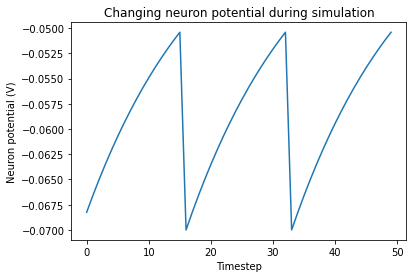

In [4]:
from matplotlib import pyplot as plt

plt.plot(np.arange(len(v_list)), v_list)
plt.xlabel("Timestep")
plt.ylabel("Neuron potential (V)")
plt.title("Changing neuron potential during simulation")
plt.show()

## Adapt the code to send spikes to output

Within networks of spiking neurons information is sent from neuron to neuron (node to node) as binary 1s or 0s. In the above equations, when $V_{thresh}$ has been reached, we've simply reset our membrane voltage to $V_{reset}$. In addition to this reset however, once this $V_{thresh}$ has been reached, an output signal is sent to the next neuron triggering an increase in current at its membrane.

Chaining these neurons together is how we can create Spiking Neural Networks (SNNs) that are able to implement complex behaviour such as interpreting sensor data or controlling robotic manipulators.

In the code block below. Adapt your code from above to also record when an output spike occurs from your simulated neuron. Then run the following code block below to plot the membrane potential alongside these output spikes. If you've implemented the behaviour correctly, the red spikes on the graph should line up with your voltage resets.

In [6]:
# TODO: Create a data structure to record your spikes, use the code snippets above as inspiration
v_list = []
s_list = [] # REMOVE

# This loop will run our simulation for the number of timesteps specified above
for time in range(timesteps):
    # Time at this timestep
    t = time * dt
    
    # Calculate the voltage at this timestep (TODO: Use the same function as you implemented above)
    #v = ?
    v = v + (dt / tau * (E_leak - v + (r*i))) # REMOVE
    
    # If we've exceeded the threshold voltage, send an output spike and reset the voltage
    if v > v_thresh:
        v = v_reset
        s_list.append(1) # REMOVE
    else:# REMOVE
        s_list.append(0)# REMOVE
        
    # Record the membrange voltage at this timestep
    v_list.append(v)

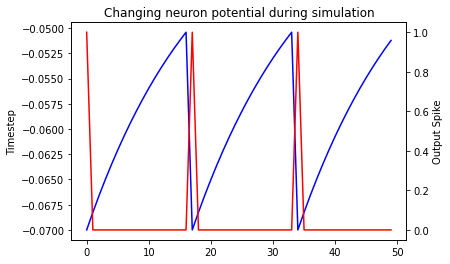

In [11]:
# Plotting spikes alongside V spikes
fig,ax1 = plt.subplots()

ax1.plot(np.arange(len(v_list)), v_list, label="Membrane Potential (V)", color="blue")
ax1.set_ylabel("Neuron potential (V)")
ax1.set_ylabel("Timestep")

ax2 = ax1.twinx()
ax2.plot(np.arange(len(s_list)), s_list, label="Output Spike", color="red")
ax2.set_ylabel("Output Spike")

plt.title("Changing neuron potential and output spikes during simulation")
plt.show()

## 3. Additional Work (Challenging)

Object-Orientated Programming (OOP) is a common coding practise that looks to create easily reusable code contained within **classes**. 

Additional reading on OOP can be found here:
https://www.techtarget.com/searchapparchitecture/definition/object-oriented-programming-OOP

In this additional work section, we will look to convert our LIF neuron function into an object. This practise becomes more important as your code grows and evolves, allowing you to make small changes to code and having those changes implemented across your system.

In the code we've implemented above, we've written out the code for our LIF neuron dynamics. By encapulating this in a class we will be able to build networks of these neurons by connecting them together, without having to write code for each individual neuron.

We can create a **class** using the code below. Fill in your neuron parameters and implement your membrane voltage calculation within the **run_spk** function.

**NOTE** when using constants within a class, you must define and reference them with the following syntax:

`self.v_thresh = -50e-3`

In [22]:
class LIFNeuron():
    def __init__(self):
        # TODO: Define the rest of the neuron parameters (constants).
        self.v_thresh = -50e-3
        self.v_reset = -70e-3
        self.tau = 20e-3
        self.E_leak = -60e-3
        self.r = 100e6
        self.v = self.v_reset
        
    # TODO: Implement your membrane voltage function
    def run_spk(self, dt, i):
        self.v = self.v + (dt / self.tau * (self.E_leak - self.v + (self.r*i)))
        
        if self.v > self.v_thresh:
            self.v = self.v_reset
            return 1
        else:
            return 0

Now that our class has been created, let's implement it within our previous simulation and plot the results.

In [32]:
import numpy as np

# Simulation parameters
timesteps = 50   # We simulate over 50 timesteps (50ms)
i = 25e-11  # Constant current of 250nA
dt = 1e-3   # Each timestep is 1ms

# This list will contain our simulation outputs
s_list = []

# Create an instance of our class
LIF = LIFNeuron()

# This loop will run our simulation for the number of timesteps specified above
for time in range(timesteps):
    # Check if there's an output spike at this timestep
    s = LIF.run_spk(dt, i)
    
    s_list.append(s)

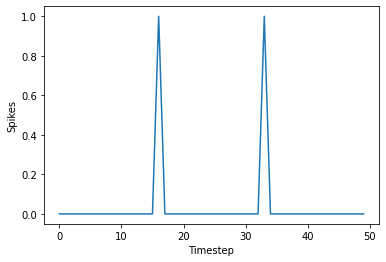

In [33]:
plt.plot(np.arange(len(s_list)), s_list)
plt.xlabel("Timestep")
plt.ylabel("Spikes")
plt.title("Class neuron output spikes")
plt.show()